# 딥러닝 예제 (mnist 데이터셋 사용)

## 실습1

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits=load_digits()

In [3]:
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [4]:
print(digits.images[112])

[[ 0.  0.  3. 11. 16. 13.  0.  0.]
 [ 0.  3. 15. 15. 13. 16.  0.  0.]
 [ 0.  6.  8.  2.  9. 14.  0.  0.]
 [ 0.  0.  4.  7. 15. 14.  5.  0.]
 [ 0.  4. 16. 16. 16. 14.  6.  0.]
 [ 0.  1.  8. 13. 12.  0.  0.  0.]
 [ 0.  0.  1. 16.  4.  0.  0.  0.]
 [ 0.  0.  3. 15.  1.  0.  0.  0.]]


In [5]:
print(digits.target[112])

7


In [6]:
images_and_labels=list(zip(digits.images, digits.target))
for item in images_and_labels:
    print(item)

(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]), 0)
(array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]), 1)
(array([[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
       [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
       [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
       [ 0.,  0.,  1.,  6., 15., 11.,  0.,  0.],
       

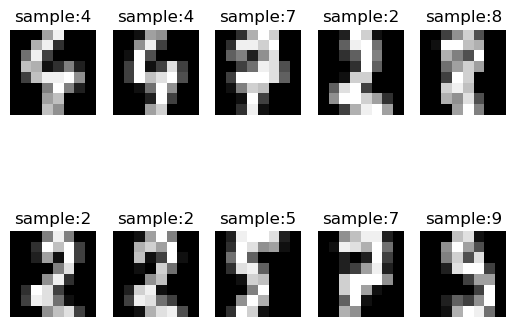

In [7]:
images_and_labels=list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[110:120]):
    plt.subplot(2,5, index+1)
    plt.axis('off')
    plt.imshow(image, cmap='gray')
    plt.title('sample:%i' % label)

In [8]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [9]:
x=digits.data
y=digits.target
print(type(x))
print(x.shape)
print(y.shape)

<class 'numpy.ndarray'>
(1797, 64)
(1797,)


In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [11]:
model=nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10)
)

In [12]:
X=torch.tensor(x, dtype=torch.float32)
Y=torch.tensor(y, dtype=torch.int64)

In [13]:
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters())

In [14]:
loss_list=[]
for epoch in range(1000):
    optimizer.zero_grad()
    y_hat=model(X)
    loss=loss_fn(y_hat,Y)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())

    if epoch%100==0:
        print(epoch, loss.item())

0 2.7788259983062744
100 0.2337031364440918
200 0.05720391497015953
300 0.022359799593687057
400 0.010440008714795113
500 0.005773875862360001
600 0.003636200912296772
700 0.0024962679017335176
800 0.0018154794815927744
900 0.0013771551894024014


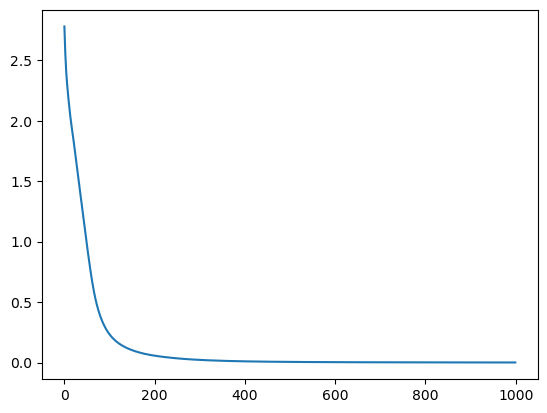

In [15]:
plt.plot(loss_list)

In [16]:
pred=model(X[[112]])
print(pred)
print(Y[112])

tensor([[ -2.8938,  -1.5687,  -4.8626, -10.3345,   1.6536,  -5.7173, -15.2086,
          15.2062,  -2.4125,  -8.1525]], grad_fn=<AddmmBackward0>)
tensor(7)


In [17]:
pred=model(X[[112]])
predicted=torch.argmax(pred)
print(pred)
print(predicted)
print(Y[112])

tensor([[ -2.8938,  -1.5687,  -4.8626, -10.3345,   1.6536,  -5.7173, -15.2086,
          15.2062,  -2.4125,  -8.1525]], grad_fn=<AddmmBackward0>)
tensor(7)
tensor(7)


## 실습2

In [18]:
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import fetch_openml

### 필기체 데이터셋(28*28)

In [19]:
mnist=fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [20]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [21]:
print(type(mnist.data))
mnist.data[0]

<class 'numpy.ndarray'>


array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

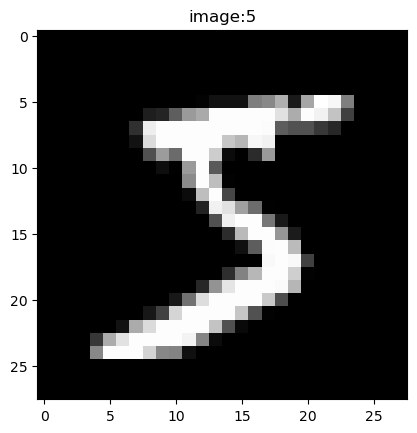

In [22]:
plt.imshow(mnist.data[0].reshape(28,28), cmap='gray')
plt.title('image:'+str(mnist.target[0]))
plt.show()

In [23]:
print(mnist.data.shape)
print(mnist.target.shape)

(70000, 784)
(70000,)


In [24]:
type(mnist.target)

numpy.ndarray

In [25]:
mnist.target=mnist.target.astype(np.int8)
mnist.target

array([5, 0, 4, ..., 4, 5, 6], dtype=int8)

### 정규화 : 값을 0-1 사이 값으로

In [26]:
x=mnist.data/255
y=mnist.target

In [27]:
x[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [28]:
y[0]

5

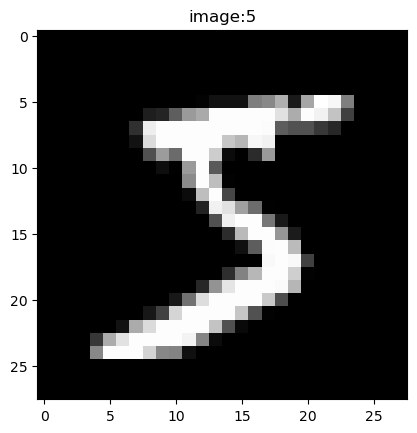

In [29]:
plt.imshow(x[0].reshape(28,28), cmap='gray')
plt.title('image:'+str(y[0]))
plt.show()

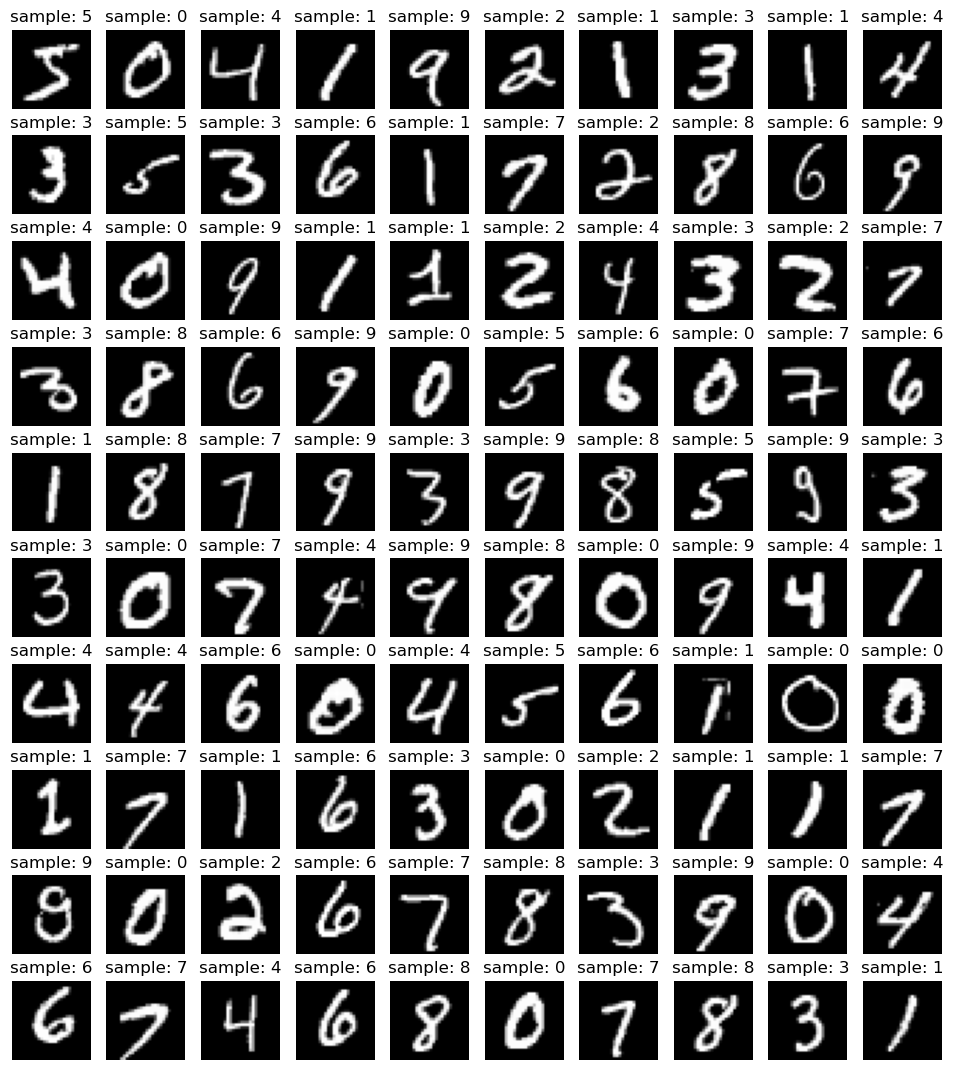

In [30]:
plt.figure(figsize=(12,13.5))   #전체 그림 사이즈

for i in range(100):
    plt.subplot(10,10, i+1)
    plt.axis('off')
    plt.imshow(x[i].reshape(28,28), cmap='gray')
    plt.title('sample: %i' % (y[i]))
plt.show()

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=1/7, random_state=0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [58]:
X_train=torch.FloatTensor(x_train)
X_test=torch.FloatTensor(x_test)
Y_train=torch.LongTensor(y_train)
Y_test=torch.LongTensor(y_test)

- **데이터셋** 만들기

- **데이터 로더** : 한번에 처리할 데이터를 올려주는 역할
- **epoch(에폭)** : train 데이터셋 크기를 모두 훈련  
  ex) 전체 훈련데이터가 60000개, 데이터로더 batch_size= 64 일 경우, 1epoch 당 W(가중치),b(편향) 업데이트는 60000/64 만큼 일어남

In [59]:
#dset
ds_train=TensorDataset(X_train, Y_train)    #하나의 데이터 셋으로 묶어줌
# load_train=DataLoader(ds_train, batch_size=64, shuffle=True)    #데이터로더 (데이터셋, batch_size(한번에 계산할 데이터량), shuffle=True(섞어서 추출함))
load_train=DataLoader(ds_train, batch_size=256, shuffle=True)    

ds_test=TensorDataset(X_test,Y_test)
# load_test=DataLoader(ds_test, batch_size=64, shuffle=True)
load_test=DataLoader(ds_test, batch_size=256, shuffle=True)


- 모델 만들기

In [60]:
model=nn.Sequential()
model.add_module('fc1',nn.Linear(28*28*1,100))  #Linear(가로*세로*채널(흑백=1, 칼라=3), 출력값)
model.add_module('relu1',nn.ReLU())
model.add_module('fc2',nn.Linear(100,100))
model.add_module('relu2',nn.ReLU())
model.add_module('fc3',nn.Linear(100,100))
model.add_module('relu3',nn.ReLU())
model.add_module('fc4',nn.Linear(100,10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=100, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=100, out_features=10, bias=True)
)


- 손실함수, 최적화 함수 만들기

In [35]:
# loss_func=nn.CrossEntropyLoss()
# optimizer=optim.Adam(model.parameters(),lr=0.1)
# print(model.parameters())
# print(list(model.parameters()))

<generator object Module.parameters at 0x000002C11C29DBD0>


In [61]:
loss_func=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.1)
print(model.parameters())
# print(list(model.parameters()))

<generator object Module.parameters at 0x000002C17FF361F0>


- 훈련 함수

In [53]:
costs=[]
accuracys=[]
epochs=[]

def train(epoch):
    model.train()
    cost=0
    accuracy=0

    for data, targets, in load_train:       # 배치 사이즈 안에서 연산
        optimizer.zero_grad()
        output=model(data)
        loss=loss_func(output, targets)
        _, y_hat=torch.max(output.data,1)       #확률이 가장 높은 레이블이 무엇인지 계산
        accuracy+=y_hat.eq(targets.data.view_as(y_hat)).sum()
        cost+=loss.item()
        loss.backward()
        optimizer.step()
    epochs.append(epoch)
    costs.append(cost)
    accuracys.append(accuracy/60000)
    print(epoch, cost, accuracy/60000)
    print(accuracy.detach().numpy()/60000)


- 테스트 함수

In [54]:
def test():
    model.eval()
    correct=0

    with torch.no_grad():
        for data, targets in load_test:
            output=model(data)
            _, predicted=torch.max(output, 1)
            correct +=predicted.eq(targets.data.view_as(predicted)).sum()
   
    data_num=len(load_test.dataset)     #총 데이터 건수
    print('테스트 데이터에서 예측 정확도: ', data_num, 100*correct/data_num)

- 훈련 전 테스트 실행

In [38]:
test()

테스트 데이터에서 예측 정확도:  10000 tensor(10.2600)


- 데이터 훈련하기

In [62]:
for epoch in range(10):
    train(epoch)
test()

0 332.57568779587746 tensor(0.5705)
0.5705333333333333
1 91.94692428410053 tensor(0.8833)
0.8833166666666666
2 64.81952089071274 tensor(0.9195)
0.9195
3 51.31251014769077 tensor(0.9371)
0.9371166666666667
4 42.182081781327724 tensor(0.9479)
0.9479166666666666
5 35.628869473934174 tensor(0.9562)
0.9562166666666667
6 30.736223626881838 tensor(0.9616)
0.9616333333333333
7 27.093059197068214 tensor(0.9665)
0.9665333333333334
8 24.2329890858382 tensor(0.9700)
0.9700333333333333
9 21.96570818684995 tensor(0.9730)
0.9730333333333333
테스트 데이터에서 예측 정확도:  10000 tensor(94.9800)


결과:  tensor(4)
정답:  tensor(4)


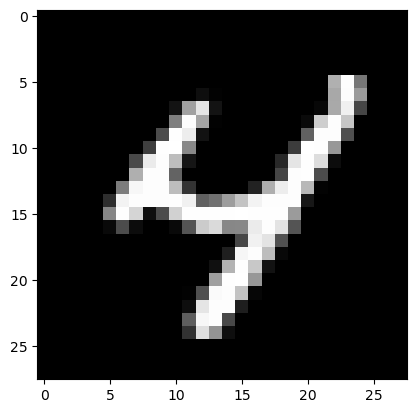

In [40]:
index=12
model.eval()
data=X_test[index]
output=model(data)
_, predicted=torch.max(output.data,0)
print("결과: ", predicted)
print("정답: ", Y_test[index])

X_test_show=(X_test[index].numpy())
plt.imshow(X_test_show.reshape(28,28), cmap='gray')
plt.show()

In [41]:
predicteds=model(X_test)
predicted_list=[]
print(predicteds)

tensor([[ 1.6040e+01, -1.1325e+01,  1.5592e+00,  ...,  3.1019e-01,
          3.1521e+00, -2.0163e+00],
        [-4.7520e+00, -1.3717e+00, -4.2658e+00,  ...,  1.7224e+00,
         -3.2625e+00,  4.9301e+00],
        [-1.0056e+01,  1.4790e+01, -3.2141e+00,  ...,  3.3629e+00,
          1.0969e+00, -1.5215e+00],
        ...,
        [-7.7069e+00,  1.6056e+01,  1.6198e-02,  ...,  6.8845e+00,
         -2.4901e-01, -3.6171e+00],
        [-8.3144e+00, -7.1974e-03,  2.2398e-01,  ...,  7.8818e-01,
          3.0247e+00,  4.7581e+00],
        [ 1.7655e+01, -1.6483e+01,  3.5051e+00,  ...,  1.5616e+00,
          2.5301e+00,  4.1906e+00]], grad_fn=<AddmmBackward0>)


In [42]:
predicteds=model(X_test)
predicted_list=[]
for i in range(len(predicteds)):
    v, index=torch.max(predicteds[i],0)
    print(v)
    print(index)

tensor(16.0403, grad_fn=<MaxBackward0>)
tensor(0)
tensor(19.9018, grad_fn=<MaxBackward0>)
tensor(4)
tensor(14.7897, grad_fn=<MaxBackward0>)
tensor(1)
tensor(14.6514, grad_fn=<MaxBackward0>)
tensor(2)
tensor(8.8378, grad_fn=<MaxBackward0>)
tensor(7)
tensor(7.1468, grad_fn=<MaxBackward0>)
tensor(9)
tensor(24.3509, grad_fn=<MaxBackward0>)
tensor(7)
tensor(12.1309, grad_fn=<MaxBackward0>)
tensor(1)
tensor(11.4515, grad_fn=<MaxBackward0>)
tensor(1)
tensor(13.3237, grad_fn=<MaxBackward0>)
tensor(7)
tensor(16.3739, grad_fn=<MaxBackward0>)
tensor(1)
tensor(21.9274, grad_fn=<MaxBackward0>)
tensor(3)
tensor(20.0357, grad_fn=<MaxBackward0>)
tensor(4)
tensor(23.1833, grad_fn=<MaxBackward0>)
tensor(2)
tensor(10.9811, grad_fn=<MaxBackward0>)
tensor(6)
tensor(17.3688, grad_fn=<MaxBackward0>)
tensor(4)
tensor(11.5328, grad_fn=<MaxBackward0>)
tensor(6)
tensor(18.4372, grad_fn=<MaxBackward0>)
tensor(7)
tensor(18.7010, grad_fn=<MaxBackward0>)
tensor(3)
tensor(17.3675, grad_fn=<MaxBackward0>)
tensor(3)
te

In [43]:
predicteds=model(X_test)
predicted_list=[]
for i in range(len(predicteds)):
    v, index=torch.max(predicteds[i],0)
    predicted_list.append(index.item())
print(predicted_list)

[0, 4, 1, 2, 7, 9, 7, 1, 1, 7, 1, 3, 4, 2, 6, 4, 6, 7, 3, 3, 7, 0, 5, 7, 6, 5, 6, 4, 7, 4, 3, 5, 0, 1, 4, 6, 3, 9, 4, 5, 8, 0, 9, 6, 0, 9, 7, 5, 7, 1, 0, 1, 3, 5, 5, 0, 5, 0, 0, 3, 7, 5, 1, 8, 4, 5, 2, 8, 2, 4, 4, 4, 3, 4, 3, 4, 5, 0, 2, 4, 0, 5, 2, 0, 4, 9, 7, 2, 1, 5, 1, 0, 7, 5, 4, 0, 4, 4, 7, 8, 7, 1, 3, 7, 0, 8, 0, 8, 2, 9, 1, 9, 3, 6, 6, 6, 4, 2, 4, 1, 8, 0, 2, 1, 1, 1, 6, 4, 9, 5, 3, 2, 3, 8, 9, 6, 7, 0, 8, 3, 1, 8, 3, 7, 0, 5, 9, 1, 2, 3, 4, 5, 7, 0, 3, 0, 7, 1, 9, 2, 7, 3, 2, 5, 5, 5, 6, 1, 8, 8, 1, 3, 1, 9, 2, 6, 5, 7, 5, 3, 4, 7, 9, 1, 8, 3, 1, 7, 0, 8, 8, 2, 5, 4, 4, 5, 6, 0, 1, 6, 1, 6, 1, 4, 8, 8, 7, 0, 7, 3, 6, 4, 0, 3, 1, 4, 6, 4, 7, 5, 0, 1, 7, 9, 9, 9, 7, 8, 8, 7, 6, 3, 9, 2, 6, 3, 7, 8, 4, 7, 2, 8, 3, 8, 3, 2, 4, 0, 6, 0, 8, 9, 7, 7, 8, 0, 3, 3, 4, 3, 4, 7, 4, 4, 3, 4, 3, 6, 1, 4, 8, 4, 7, 9, 0, 2, 8, 0, 2, 2, 6, 4, 2, 8, 3, 6, 5, 9, 7, 3, 0, 4, 3, 0, 9, 2, 0, 2, 5, 3, 1, 3, 1, 9, 6, 4, 1, 8, 2, 2, 7, 5, 7, 6, 8, 6, 8, 3, 2, 2, 2, 8, 0, 0, 7, 7, 9, 8, 8, 4, 3, 9, 3, 

In [44]:
predicteds=model(X_test)
predicted_list=[]
for i in range(len(predicteds)):
    v, index=torch.max(predicteds[i],0)
    predicted_list.append(index.item())
print(predicted_list)

[0, 4, 1, 2, 7, 9, 7, 1, 1, 7, 1, 3, 4, 2, 6, 4, 6, 7, 3, 3, 7, 0, 5, 7, 6, 5, 6, 4, 7, 4, 3, 5, 0, 1, 4, 6, 3, 9, 4, 5, 8, 0, 9, 6, 0, 9, 7, 5, 7, 1, 0, 1, 3, 5, 5, 0, 5, 0, 0, 3, 7, 5, 1, 8, 4, 5, 2, 8, 2, 4, 4, 4, 3, 4, 3, 4, 5, 0, 2, 4, 0, 5, 2, 0, 4, 9, 7, 2, 1, 5, 1, 0, 7, 5, 4, 0, 4, 4, 7, 8, 7, 1, 3, 7, 0, 8, 0, 8, 2, 9, 1, 9, 3, 6, 6, 6, 4, 2, 4, 1, 8, 0, 2, 1, 1, 1, 6, 4, 9, 5, 3, 2, 3, 8, 9, 6, 7, 0, 8, 3, 1, 8, 3, 7, 0, 5, 9, 1, 2, 3, 4, 5, 7, 0, 3, 0, 7, 1, 9, 2, 7, 3, 2, 5, 5, 5, 6, 1, 8, 8, 1, 3, 1, 9, 2, 6, 5, 7, 5, 3, 4, 7, 9, 1, 8, 3, 1, 7, 0, 8, 8, 2, 5, 4, 4, 5, 6, 0, 1, 6, 1, 6, 1, 4, 8, 8, 7, 0, 7, 3, 6, 4, 0, 3, 1, 4, 6, 4, 7, 5, 0, 1, 7, 9, 9, 9, 7, 8, 8, 7, 6, 3, 9, 2, 6, 3, 7, 8, 4, 7, 2, 8, 3, 8, 3, 2, 4, 0, 6, 0, 8, 9, 7, 7, 8, 0, 3, 3, 4, 3, 4, 7, 4, 4, 3, 4, 3, 6, 1, 4, 8, 4, 7, 9, 0, 2, 8, 0, 2, 2, 6, 4, 2, 8, 3, 6, 5, 9, 7, 3, 0, 4, 3, 0, 9, 2, 0, 2, 5, 3, 1, 3, 1, 9, 6, 4, 1, 8, 2, 2, 7, 5, 7, 6, 8, 6, 8, 3, 2, 2, 2, 8, 0, 0, 7, 7, 9, 8, 8, 4, 3, 9, 3, 

In [45]:
predicteds=model(X_test)
predicted_list=[]
for i in range(len(predicteds)):
    v, index=torch.max(predicteds[i],0)
    predicted_list.append(index.item())
predicted=torch.from_numpy(np.array(predicted_list))
print(predicted)
print(Y_test)

tensor([0, 4, 1,  ..., 1, 3, 0], dtype=torch.int32)
tensor([0, 4, 1,  ..., 1, 3, 0])


In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

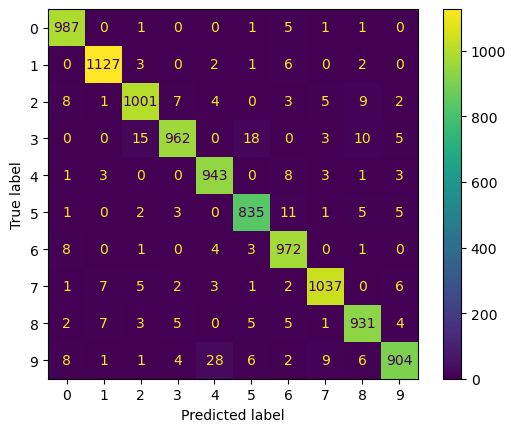

In [47]:
cm=confusion_matrix(Y_test, predicted)
ConfusionMatrixDisplay(cm).plot()